# Import Packages 

In [88]:
import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
import matplotlib.pyplot as plt
import cv2
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


%matplotlib inline
np.random.seed(1)
tf.random.set_seed(2)

# Load Data

In [27]:
def create_data(data_dir, categories):
    
    
    data=[] 
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        for file_name in os.listdir(category_dir):
            if "_mask" in file_name:
                continue
            image_file_path = os.path.join(category_dir, file_name)
            mask_file_name = file_name.replace(".", "_mask.")
            mask_file_path = os.path.join(category_dir, mask_file_name)
            if not os.path.exists(mask_file_path):
                continue
            img_array = cv2.imread(image_file_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (256, 256)) 
            mask_array = cv2.imread(mask_file_path)
            mask_array = cv2.cvtColor(mask_array, cv2.COLOR_BGR2RGB)
            new_mask_array = cv2.resize(mask_array, (256, 256))
            data.append([new_img_array,new_mask_array,category])
            

    print(f"Found {len(data)} image/mask pairs in {len(categories)} categories")
    return data


In [28]:
data_dir = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"
categories = ['benign','malignant','normal']

data=create_data(data_dir,categories)

Found 780 image/mask pairs in 3 categories


# Splitting the Data 

In [29]:
data_train, data_test = train_test_split(data, test_size=0.2)
data_train, data_val = train_test_split(data_train, test_size=0.2)

In [71]:
X_image_train=[]
y_train = []

In [72]:
for features_image,features_mask,label in data_train:
    
    X_image_train.append(features_image)
    y_train.append(label)

# Encode Data


In [ ]:
# define a lambda function to convert categorical labels to numerical labels
convert_label = lambda x: 0 if x == 'normal' else (1 if x == 'malignant' else 2)

# apply the conversion function to each element of the y_train list using map
y_train = list(map(convert_label, y_train))


In [ ]:
y_train=np.array(y_train)

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [73]:
X_image_train = np.array(X_image_train).reshape(-1, 256,256, 3)


In [ ]:
Y_train = convert_to_one_hot(y_train, 3).T


In [33]:
X_image_train.shape

(499, 256, 256, 3)

# Create Model 

In [89]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=(256,256,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  

model2.add(Dense(64))

model2.add(Dense(3))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fitting the model

In [90]:
history = model2.fit(X_image_train,Y_train,epochs = 10)

Epoch 1/10
16/16 [==============================] - 74s 4s/step - loss: 2155.0447 - accuracy: 0.4749
Epoch 2/10
16/16 [==============================] - 71s 4s/step - loss: 0.7514 - accuracy: 0.7074
Epoch 3/10
16/16 [==============================] - 71s 4s/step - loss: 0.4524 - accuracy: 0.7996
Epoch 4/10
16/16 [==============================] - 71s 4s/step - loss: 0.3269 - accuracy: 0.8597
Epoch 5/10
16/16 [==============================] - 71s 4s/step - loss: 0.2336 - accuracy: 0.9178
Epoch 6/10
16/16 [==============================] - 71s 4s/step - loss: 0.1358 - accuracy: 0.9619
Epoch 7/10
16/16 [==============================] - 71s 4s/step - loss: 0.0676 - accuracy: 0.9840
Epoch 8/10
16/16 [==============================] - 73s 5s/step - loss: 0.0302 - accuracy: 0.9960
Epoch 9/10
16/16 [==============================] - 73s 5s/step - loss: 0.0114 - accuracy: 0.9980
Epoch 10/10
16/16 [==============================] - 72s 5s/step - loss: 0.0040 - accuracy: 1.0000


## Make Prediction 

In [110]:
label_names = {
    0: "normal",
    1: "malignant",
    2: "benign",
}

In [113]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = label_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 72ms/step


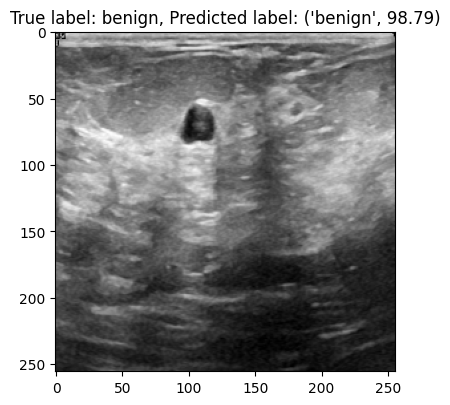

1/1 [==============================] - 0s 69ms/step


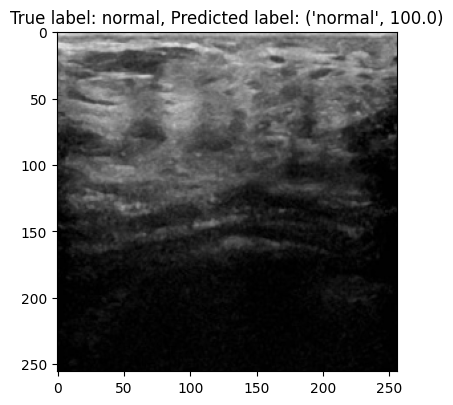

1/1 [==============================] - 0s 71ms/step


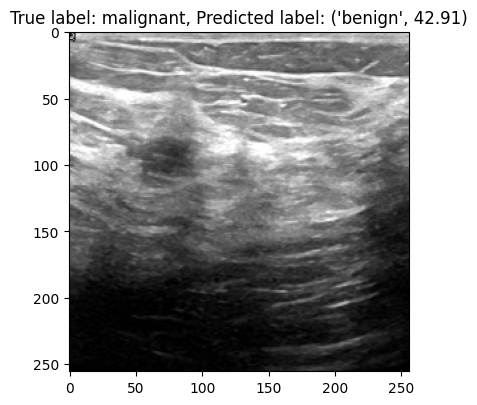

1/1 [==============================] - 0s 71ms/step


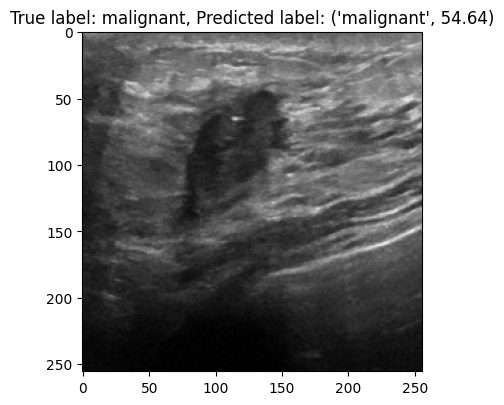

1/1 [==============================] - 0s 72ms/step


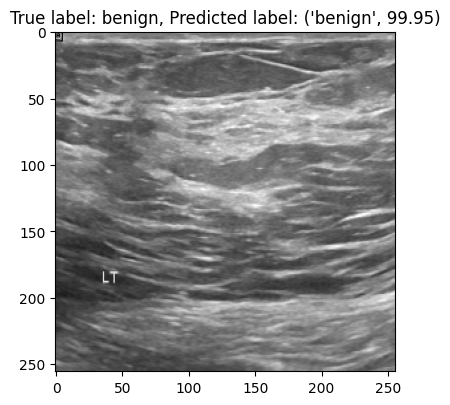

1/1 [==============================] - 0s 72ms/step


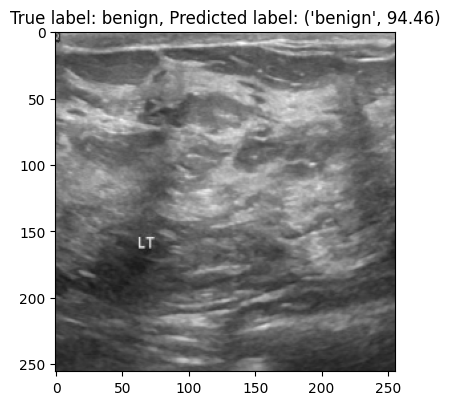

1/1 [==============================] - 0s 69ms/step


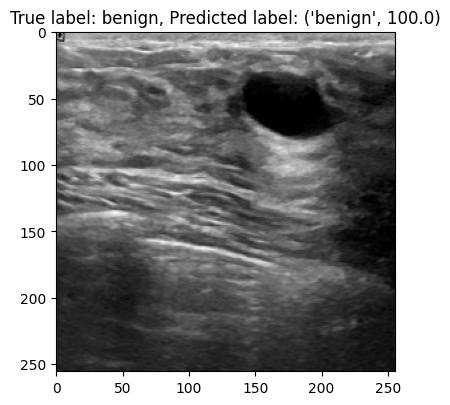

1/1 [==============================] - 0s 69ms/step


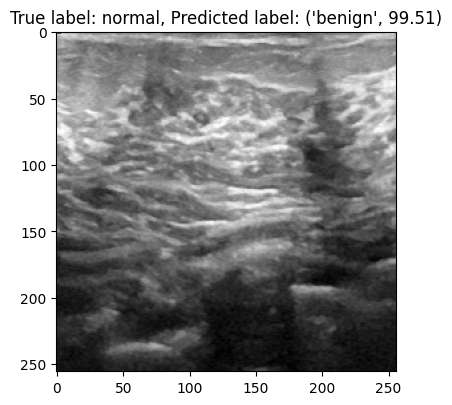

1/1 [==============================] - 0s 68ms/step


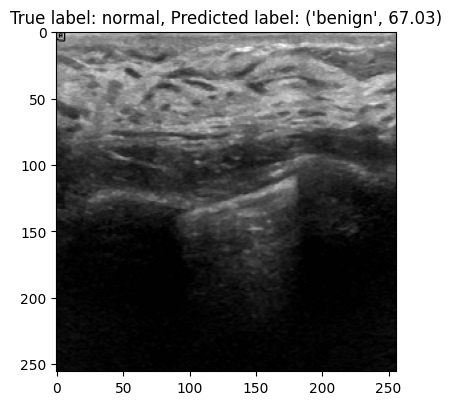

In [132]:
import matplotlib.pyplot as plt

# Define the mapping of labels to their names


# Loop over each image in the data_test array
for i in range(9):
      # Get the image and label
    image = data_test[i][0]
    label = data_test[i][2]

    # Predict the label using the predict_label function
    predicted_label = predict(model2, image)

    # Plot the image with the true and predicted labels as the title
    
    plt.figure(figsize=(15, 15))
    ax = plt.subplot(3, 3, i + 1)  
    plt.imshow(image)
    
    plt.title(f"True label: {label}, Predicted label: {predicted_label}")
    plt.show()
    
    
    
    
 

# Save the Model 

In [134]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model2, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                              